In [1]:
import pandas as pd
import json
from pprint import pprint
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})
display(HTML("<style>.container { width:70% !important; }</style>"))

In [20]:
results = json.load(open("../pingresults.json","r"))

In [21]:
# Clear tipy-vm prefix from VM names:
results = {vm1_name.split("-")[-1]: {vm2_name.split("-")[-1]: metrics for vm2_name, metrics in other_vms.items()} 
           for vm1_name, other_vms in results.items()}

In [22]:
def get_single_metric(data: dict, metric_name="avg"):
    return {vm1_name: {vm2_name: metrics[metric_name] for vm2_name, metrics in other_vms.items()}
            for vm1_name, other_vms in data.items()}

In [23]:
df_avg = pd.DataFrame.from_dict(get_single_metric(results, "avg"))#.sort_index(axis=0).sort_index(axis=1)
df_min = pd.DataFrame.from_dict(get_single_metric(results, "min"))#.sort_index(axis=0).sort_index(axis=1)
df_max = pd.DataFrame.from_dict(get_single_metric(results, "max"))#.sort_index(axis=0).sort_index(axis=1)
df_mdev = pd.DataFrame.from_dict(get_single_metric(results, "mdev"))#.sort_index(axis=0).sort_index(axis=1)

In [24]:
df_avg = pd.concat([df_avg.iloc[[-1]], df_avg[:-1]])  # just move eastus row on top 

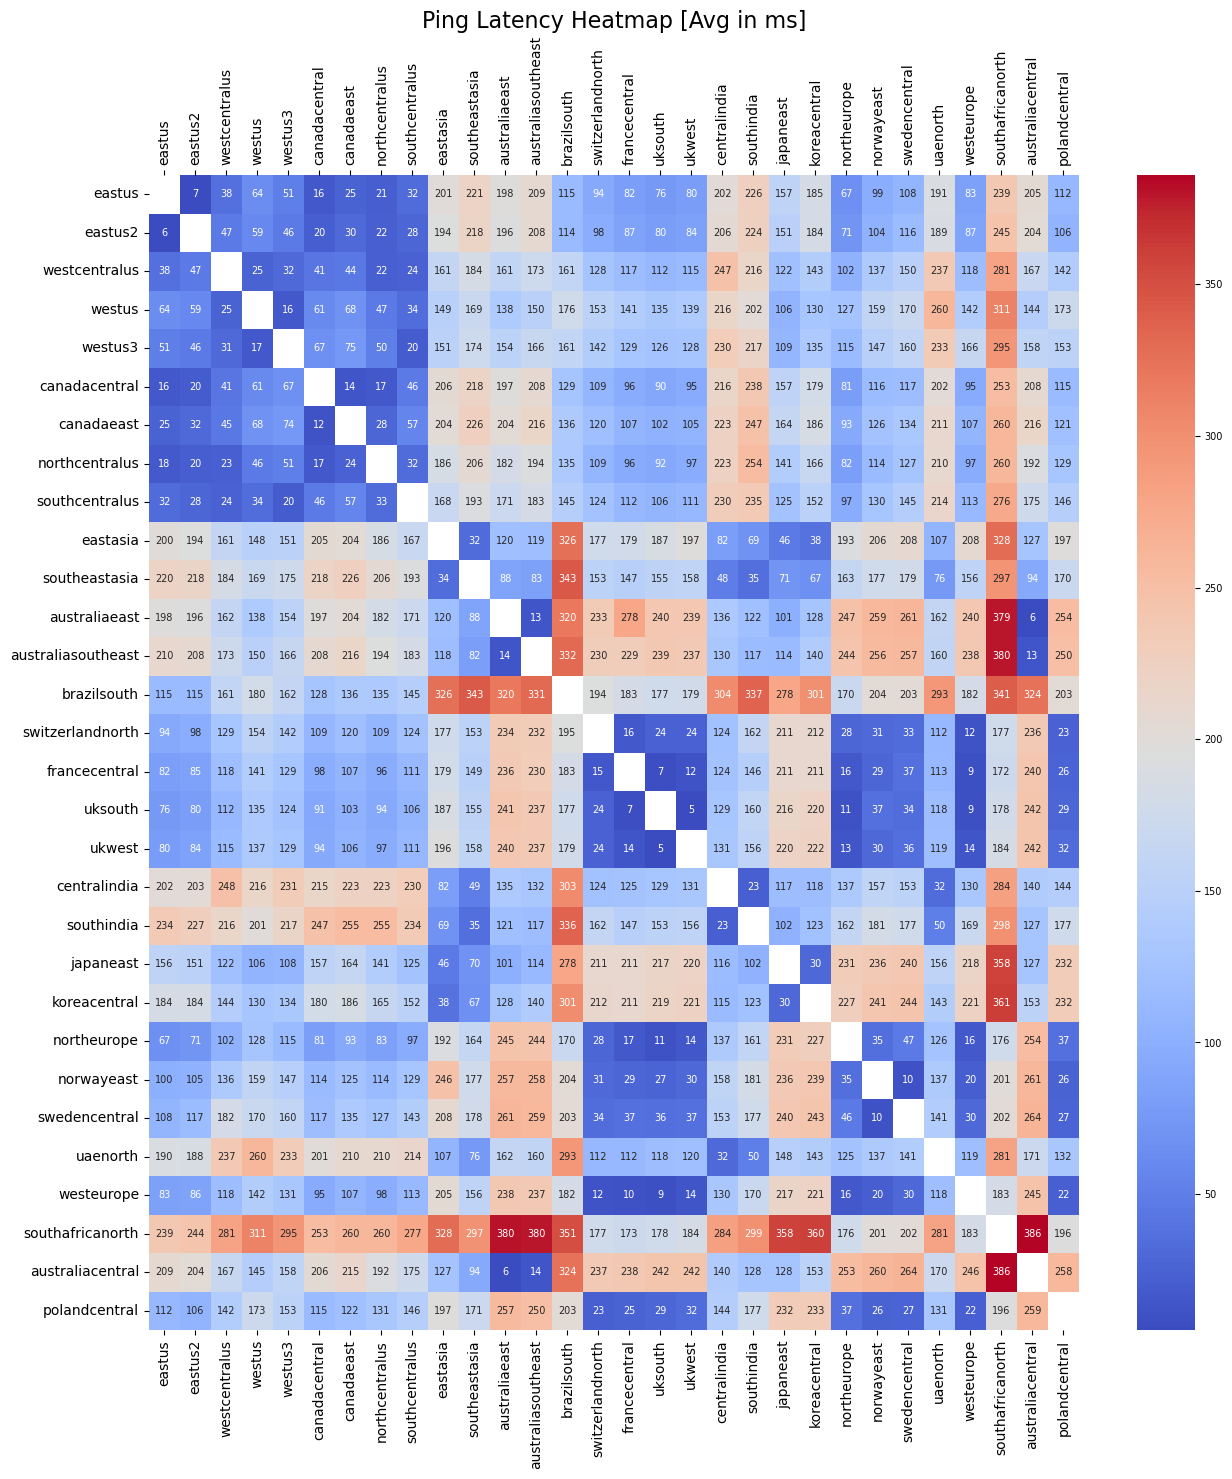

In [25]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_avg, annot=True, cmap='coolwarm', fmt=".0f")
ax.tick_params(top=True, labeltop=True, labelrotation=0)
plt.xticks(rotation='vertical')
plt.title('Ping Latency Heatmap [Avg in ms]', size=16)
plt.tick_params(axis='both', which='both', labelsize=10)
plt.show()